<a href="https://colab.research.google.com/github/VR952004/Compute_tasks/blob/main/Task-5/VR_Compute_SVM_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link:
https://drive.google.com/file/d/1DLjBn6uLiCT6Cg8TtR87cK-lYwaOQr6F/view?usp=sharing


Dataset column information:



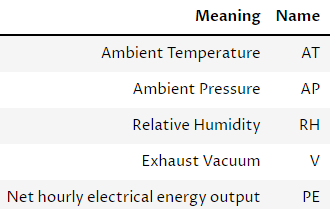

##Q1 Import the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/csv files/Data.csv")

In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


##Q2 Feature Scaling

**Checking for null values**

In [5]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

**Checking for outliers**

This is an important step since the accuracy of SVMs can be greatly affected due to the presence of outliers. This is because in SVM the algorithm picks hyperplanes and the margins of these hyperplanes are picked on the basis of extreme points, thus the presence of an outlier will greatly deteriorate the hyperplane that the algorithm selects.

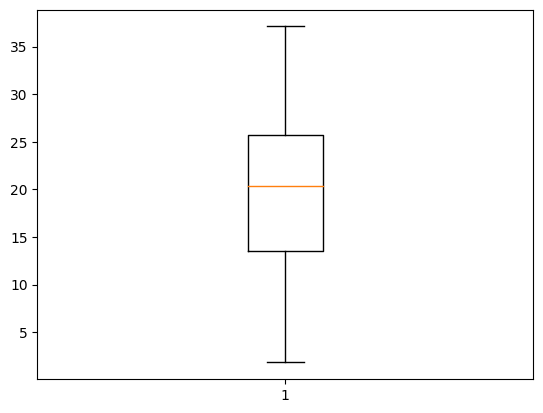

In [6]:
plt.boxplot(df['AT'])

plt.show()

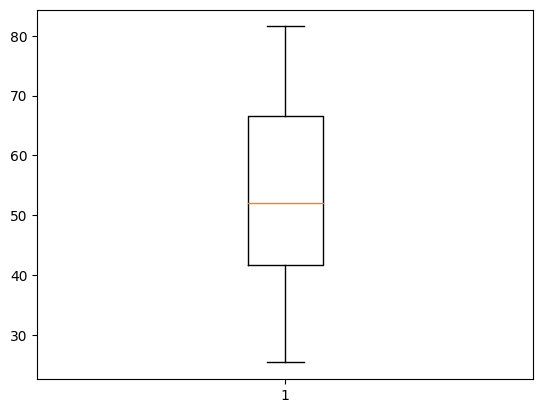

In [7]:
plt.boxplot(df['V'])

plt.show()

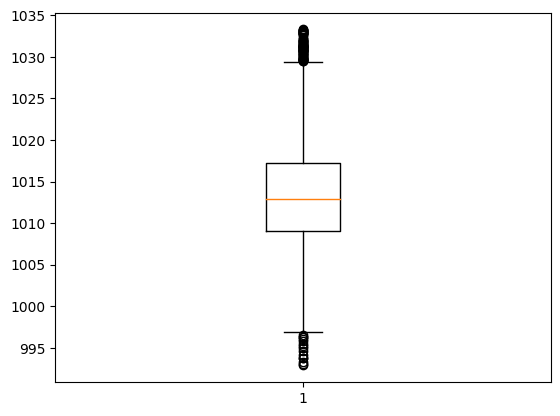

In [8]:
plt.boxplot(df['AP'])

plt.show()

In [9]:
df['AP'].describe()

count    9568.000000
mean     1013.259078
std         5.938784
min       992.890000
25%      1009.100000
50%      1012.940000
75%      1017.260000
max      1033.300000
Name: AP, dtype: float64

In [10]:
q1=1009.10
q3=1017.26

iqr=q3-q1

ll=q1-1.5*iqr
ul=q3+1.5*iqr

In [11]:
df.loc[df["AP"] > ul, "AP"] = ul
df.loc[df["AP"] < ll, "AP"] = ll

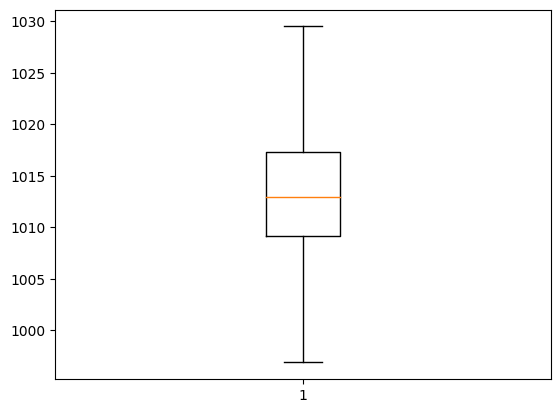

In [12]:
plt.boxplot(df['AP'])

plt.show()

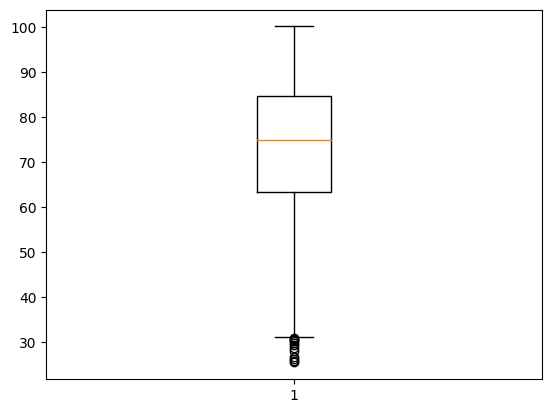

In [13]:
plt.boxplot(df['RH'])

plt.show()

In [14]:
df["RH"].describe()

count    9568.000000
mean       73.308978
std        14.600269
min        25.560000
25%        63.327500
50%        74.975000
75%        84.830000
max       100.160000
Name: RH, dtype: float64

In [15]:
q1=63.327500
q3=84.830000

iqr=q3-q1

ll=q1-1.5*iqr

In [16]:
df.loc[df["RH"]<ll,"RH"]=ll

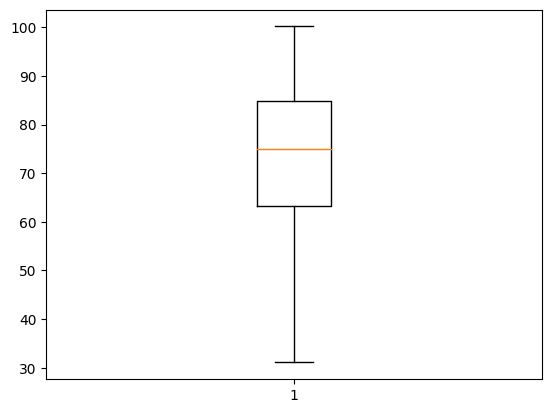

In [17]:
plt.boxplot(df['RH'])

plt.show()

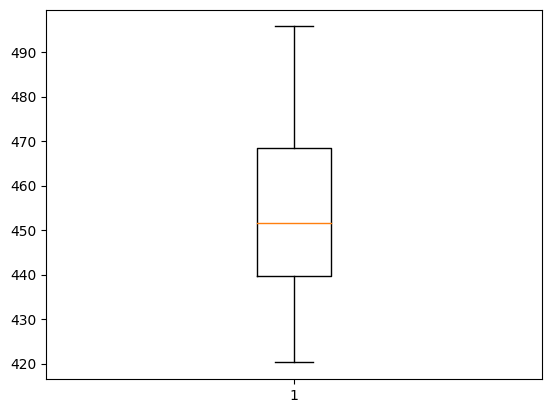

In [18]:
plt.boxplot(df['PE'])

plt.show()

##Q3 Split the dataset into the Training set and Test set

In [19]:
split_index=int(0.8*len(df))

train=df.iloc[:split_index]
test=df.iloc[split_index:]

In [20]:
train.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [21]:
test.head()

,AT,V,AP,RH,PE
7654,6.45,35.77,1018.86,67.84,483.12
7655,23.86,74.93,1016.88,71.44,444.38
7656,27.16,47.43,1009.17,45.79,442.85
7657,33.97,72.29,1008.98,44.32,432.33
7658,10.37,40.03,1017.47,90.47,477.91


In [22]:
def in_out_splitter(dataframe):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  return x,y

xtrain,ytrain=in_out_splitter(train)
xtest,ytest=in_out_splitter(test)

##Q4 Implement SVR

###4a RBF Kernel

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
rbf_kernel_model=SVC(kernel="rbf",C=1.0,gamma=1/2,shrinking=False)

num_bins = 5
ytrain_categorical=pd.cut(ytrain,bins=num_bins,labels=False)
ytest_categorical=pd.cut(ytest,bins=num_bins,labels=False)

rbf_kernel_model.fit(xtrain,ytrain_categorical)

SVC(gamma=0.5, shrinking=False)

In [24]:
y_pred=rbf_kernel_model.predict(xtest)

print(classification_report(ytest_categorical,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       264
           1       0.65      0.86      0.74       656
           2       0.79      0.62      0.70       423
           3       0.80      0.73      0.76       408
           4       0.86      0.51      0.64       163

    accuracy                           0.71      1914
   macro avg       0.75      0.66      0.69      1914
weighted avg       0.73      0.71      0.71      1914



###4b Linear Kernel

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
linear_kernel_model=SVC(kernel="linear",C=1.0,gamma=1/2,shrinking=False)

num_bins = 5
ytrain_categorical=pd.cut(ytrain,bins=num_bins,labels=False)
ytest_categorical=pd.cut(ytest,bins=num_bins,labels=False)

linear_kernel_model.fit(xtrain,ytrain_categorical)

SVC(gamma=0.5, kernel='linear', shrinking=False)

In [26]:
y_pred=linear_kernel_model.predict(xtest)

print(classification_report(ytest_categorical,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68       264
           1       0.78      0.77      0.77       656
           2       0.75      0.70      0.72       423
           3       0.77      0.77      0.77       408
           4       0.83      0.73      0.78       163

    accuracy                           0.75      1914
   macro avg       0.75      0.75      0.75      1914
weighted avg       0.75      0.75      0.75      1914



###4c Polynomial Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
polynomial_kernel_model=SVC(kernel="poly",C=1.0,gamma=1/2,shrinking=False)

num_bins = 5
ytrain_categorical=pd.cut(ytrain,bins=num_bins,labels=False)
ytest_categorical=pd.cut(ytest,bins=num_bins,labels=False)

polynomial_kernel_model.fit(xtrain,ytrain_categorical)

In [ ]:
y_pred=polynomial_kernel_model.predict(xtest)

print(classification_report(ytest_categorical,y_pred))

###4d Sigmoid Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
sigmoid_kernel_model=SVC(kernel="poly",C=1.0,gamma=1/2,shrinking=False)

num_bins = 5
ytrain_categorical=pd.cut(ytrain,bins=num_bins,labels=False)
ytest_categorical=pd.cut(ytest,bins=num_bins,labels=False)

sigmoid_kernel_model.fit(xtrain,ytrain_categorical)

In [ ]:
y_pred=sigmoid_kernel_model.predict(xtest)

print(classification_report(ytest_categorical,y_pred))